## Simple Regression Using Tesorflow

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

2022-01-09 19:22:17.342466: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-09 19:22:17.342488: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
X = tf.range(-100, 100, 4)
y = X + 10
X, y

2022-01-09 19:22:19.193387: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-01-09 19:22:19.193464: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: bourne
2022-01-09 19:22:19.193483: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: bourne
2022-01-09 19:22:19.193639: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 460.91.3
2022-01-09 19:22:19.193701: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 460.91.3
2022-01-09 19:22:19.193718: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 460.91.3
2022-01-09 19:22:19.195734: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operat

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

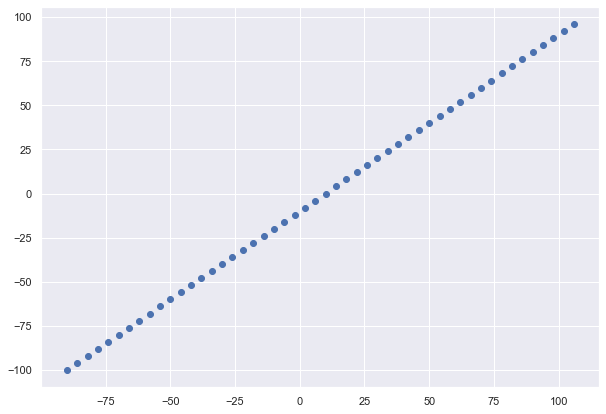

In [3]:
plt.figure(figsize=[10, 7])
plt.scatter(y, X)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X.numpy(), y.numpy(), random_state=42, test_size=0.2,  shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X.numpy(), y.numpy(), random_state=42, test_size=0.2)

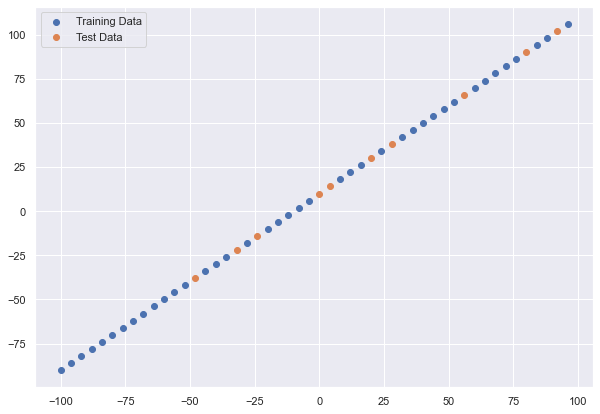

In [5]:
plt.figure(figsize=[10, 7])
# plot X_train, y_train
plt.scatter(X_train, y_train, label='Training Data')
# plot X_test, y_test
plt.scatter(X_test, y_test, label='Test Data')
plt.legend()
plt.show()

In [6]:
# set the random seed
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(1,)),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['mae'])

# 3. fit the model
history = model.fit(X_train, y_train, epochs=100, verbose=0)

Text(0, 0.5, 'loss')

<Figure size 720x504 with 0 Axes>

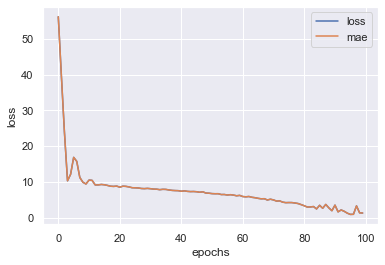

In [7]:
# ploting history
plt.figure(figsize=[10, 7])
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')

In [8]:
y_pred = model.predict(X_test)
y_pred

array([[-36.05633 ],
       [ 63.68538 ],
       [ 29.159399],
       [ 86.7027  ],
       [-20.711454],
       [ 98.21134 ],
       [ 13.81452 ],
       [  9.978302],
       [ 36.831837],
       [-13.039016]], dtype=float32)

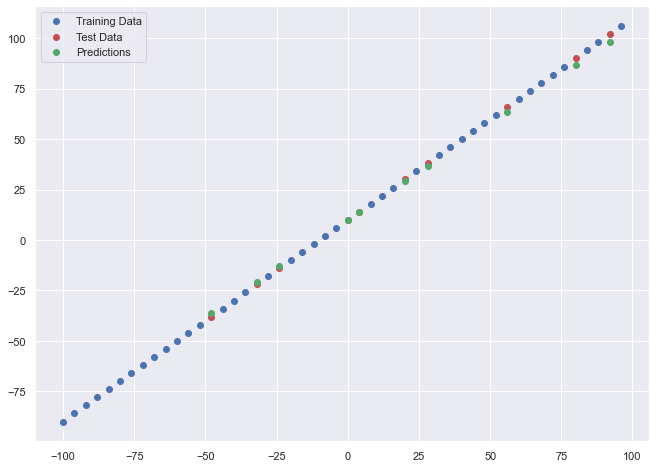

In [9]:
plt.figure(figsize=[11, 8])
# plot X_train, y_train
plt.scatter(X_train, y_train, label='Training Data')
# plot X_test, y_test
plt.scatter(X_test, y_test, c='r', label='Test Data')
# plot y_pred
plt.scatter(X_test, y_pred, c='g', label='Predictions')
plt.legend()
plt.show()

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               200       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


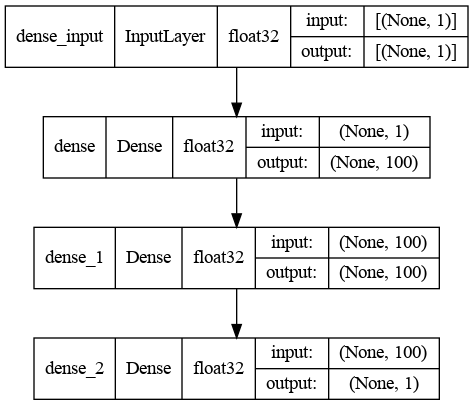

In [11]:
# plot model
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True, to_file='../model_plot/simple-regression.png')